In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

### **Que-1**

We use the following equation to solve the linear regression model

given X,y we write the optimization problem as 

\begin{align}
\min_{\beta} \frac{1}{2} ||X\beta - y||^2\\
\beta^* = (X^TX)^{-1}X^Ty
\end{align}

In [37]:
def read_regression_file(fn):
    with open(fn, 'r') as f:
        nf, ny = list(map(lambda x: int(x), f.readline().split(" ")))
        dv = []
        for dl in f.readlines()[1:]:
            dl = dl.replace("\n", "").split(",")
            fdl = [float(i) for i in dl]
            dv.append(fdl)
        dv = np.array(dv)
        x, y = dv[:, :nf], dv[:, -ny:]
        return x, y 

def get_weights(X, y):
    nx = X.shape[0]
    oa = np.ones((nx, 1))
    nX = np.concatenate([oa,X], axis = 1)
    wt = np.dot(np.linalg.inv(np.dot(nX.T, nX)), np.dot(nX.T, y))
    return wt

def get_polynomial_x(x):
    nx = x.shape[0]
    x1, x2 = x[:, 0:1], x[:, 1:]
    return np.concatenate([np.ones((nx,1)), x1, x1**2, x1**3], axis=1)


def call_LinReg(file = "lin_regression/regression_data_039.txt"):
    x, y = read_regression_file(file)
    wt = get_weights(x,y)
    return wt

def call_PolyLinReg(file = "poly_regression/poly_regression_data_039.txt"):
    x, y = read_regression_file(file)
    px = get_polynomial_x(x)
    wt = get_weights(px, y)
    return wt

# weights_LR = call_LinReg()


### **Que-2**

PCA algorithm is as follows

\begin{align}
X = [x_1, x_2, x_3, ..., x_n] \\
X \in R^{n \times f}, x_i \in R^{n} \\
X = (X - \mu_x)\\
cov(X) = \frac{1}{n} X^TX
\end{align}

we use $X^TX$ in calculating the covariance matrix due to the structure of X

choose V to be eigen vectors corresponding to top $k$ eigen values
$$
V = [v_1, v_2, ..., v_k]; V \in R^{f \times k}
$$

we get the reduced data as 

$$
Y = XV
$$

and the reconstuction is given by

$$
Y^{'} = XVV^T
$$


In [38]:
def standardize_data(X):
    mu_x = np.mean(X, axis = 0)
    X = X - mu_x # centering data
    return X, mu_x

def get_CovMat(X):
    npX = X.shape[0]
    cov = np.dot(X.T, X) / (npX)
    return cov 

def compute_pca_eigen(X, n_components):
    cov_mat = get_CovMat(X) 
    eig_val, eig_vec = np.linalg.eigh(cov_mat) # eigh return eigenvalues in sorted order
    components = eig_vec.T[::-1][:n_components].T
    eig_val = eig_val / np.sum(eig_val)
    return components, eig_val[::-1][:n_components]

def PCA(X, n_comp):
    X, mu_x = standardize_data(X)
    components, variance_ratios = compute_pca_eigen(X, n_comp)
    return components, mu_x

def read_csv_mnist(file = 'dataset/MNIST_CSV/mnist_train.csv'):
    fdata = pd.read_csv(file)
    data = fdata.values
    x,y = data[:, 1:], data[:, 0]
    return x, y

def reconstruct_images(X, components, mean):
    X = X - mean
    return X @ components @ components.T

In [39]:
num_comp = [20,80,150,300,400,784]
transforms_mux = []
X, y = read_csv_mnist(file = 'dataset/MNIST_CSV/mnist_train.csv')
for n_comp in num_comp:
    transform, mu_x = PCA(X, n_comp=n_comp)
    transforms_mux.append((transform, mu_x))

In [40]:
outs = []
X_x, y_y = read_csv_mnist(file = "dataset/MNIST_CSV/mnist_test.csv")
for transform, mu_x in transforms_mux:
    out = reconstruct_images(X_x, transform, mu_x)
    outs.append(out)

In [41]:
def get_index_class(classes, y):
    idxes = []
    for i in range(classes):
        idxes.append((np.where(y == i)[0][0], i))
    return idxes

def plot_row(ax, X, row, classes, img_size):
    for col in range(classes):
        cur_x = X[col].reshape(img_size)
        cur_x[cur_x < 0] = 0.0
        ax[row][col].imshow(cur_x, cmap='gray')
        ax[row][col].set_axis_off()

def get_sel_images(RX, idxes):
    RXF = []
    for idx, cls in idxes:
        RXF.append(RX[idx,:])
    return RXF

def plot_imgs(ax, RX, row, idxes, classes=10, img_size=(28,28)):
    RXF = get_sel_images(RX, idxes)
    plot_row(ax, RXF, row, classes, img_size)

def plot_images_pca(X_x, y_y, outs, num_comp, classes, img_size):
    idxes = get_index_class(10, y_y)
    fig,ax = plt.subplots(nrows = len(num_comp) + 1, ncols = classes, figsize=(10,8))
    row = 0
    plot_imgs(ax, X_x, row, idxes, classes=classes, img_size=img_size)
    row += 1
    for out in outs:
        plot_imgs(ax, out, row, idxes, classes=classes, img_size=img_size)
        row += 1

    for i in range(classes):
        ax[0][i].set_title(f"class: {i}")

    for i in range(1, len(num_comp)):
        ax[i][0].set_xlabel(f"NC: {num_comp[i]}")
    plt.show()

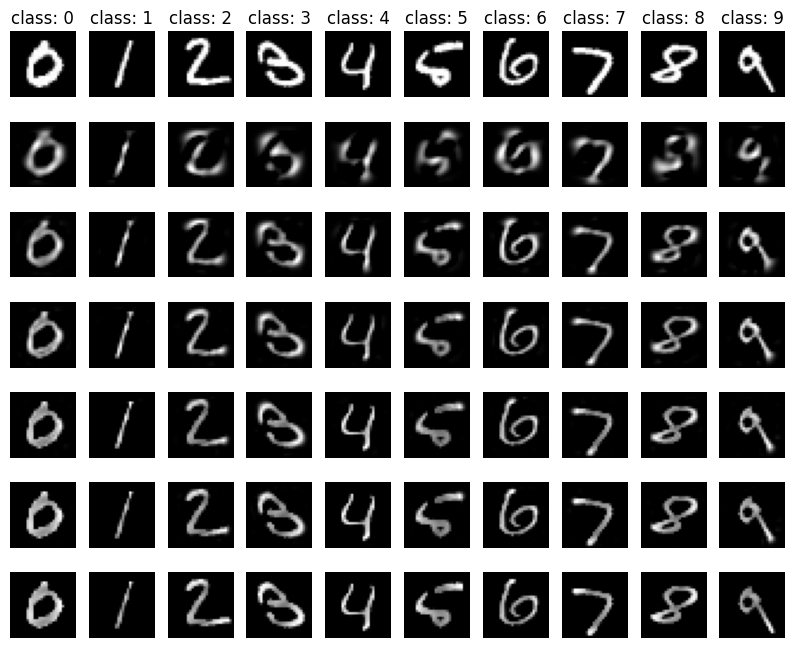

In [42]:
plot_images_pca(X_x, y_y, outs, num_comp, 10, (28,28))